# TP2 - Manipulation et Egalisation d'histogramme

## Travail fait par : Arij Habbechi et Yasmine Gharbi RT4/1

#Objectif :

L'objectif de ce TP est d'appliquer et de comparer différentes techniques d'amélioration d'image basées sur l'histogramme, d'analyser leurs effets sur la qualité d'image, et de comprendre leur applicabilité dans différents scénarios.

In [ ]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
path = "/content/vallee.png"
image = cv2.imread(path)

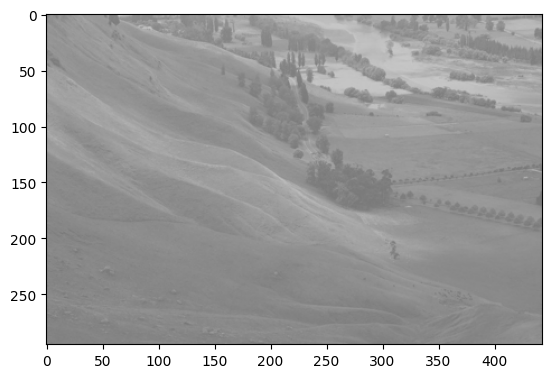

In [ ]:
plt.imshow(image,cmap="gray", vmin=0, vmax=255)
plt.show()

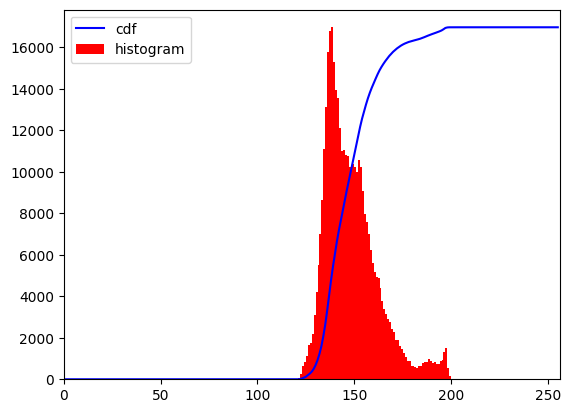

In [ ]:
hist,bins = np.histogram(image.flatten(),256,[0,256])
#cdf= Cumulative Distribution Function of an image
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


##Observation :

L'image montre un contraste faible, avec des zones sombres et des détails qui sont difficiles à distinguer, notamment dans les régions de la vallée et sur les flancs des collines.


L'histogramme montre une concentration d'intensités dans les basses valeurs, indiquant une image globalement sombre avec des pics marqués dans les tons moyens, ce qui est cohérant avec la présence de certaines régions plus claires.




#Histogram Equalization :

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(image)

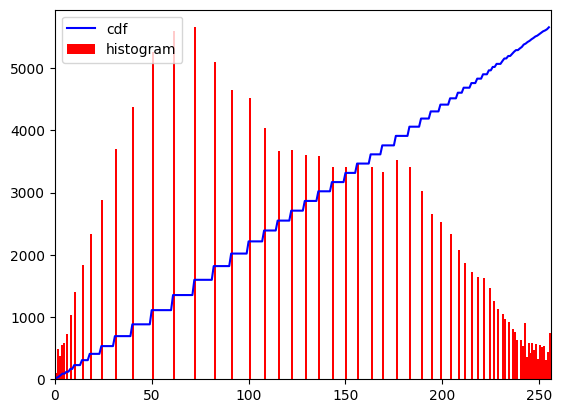

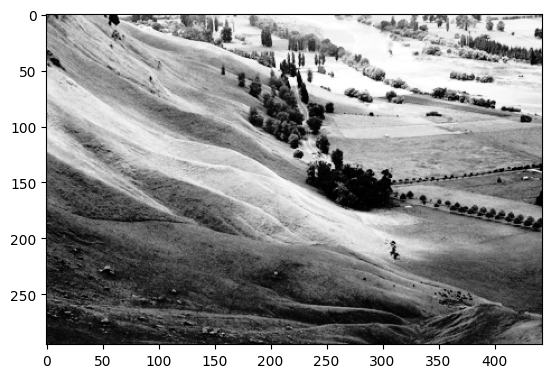

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
#cdf= Cumulative Distribution Function of an image
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(equ,cmap="gray", vmin=0, vmax=255)
plt.show()

##Observation et interpretation :

HE répartit uniformément les intensités sur toute la gamme disponible, ce qui peut aplatir les nuances dans les zones à fort contraste.

**Histogramme après HE** : L'histogramme montre une répartition plus uniforme des intensités de pixels, indiquant que l'HE a étendu la gamme de contraste sur tout le spectre d'intensités.


**Image après HE :** L'image résultante démontre un contraste nettement amélioré. Les détails des zones sombres et claires sont plus visibles, bien que cela puisse conduire à une certaine perte de nuances dans les régions très claires ou très sombres.

#Cumulative Histogram Equalization :

In [ ]:
def cumulative_histogram_equalization(image):
    # Ensure the image is in grayscale
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Compute the histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Step 2: Calculate the CDF
    cdf = hist.cumsum()

    # Step 3: Find the minimum non-zero value in the CDF
    cdf_min = cdf[np.nonzero(cdf)].min()

    # Step 4: Normalize the CDF
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf - cdf_min).max()
    cdf_normalized = cdf_normalized.astype('uint8')

    # Step 5 & 6: Calculate new pixel values and replace them
    equalized_image = cdf_normalized[image]

    return equalized_image


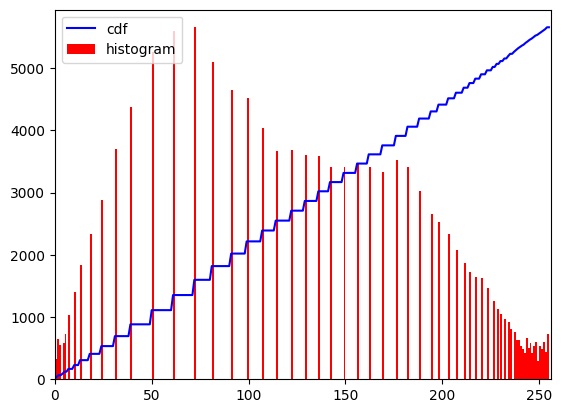

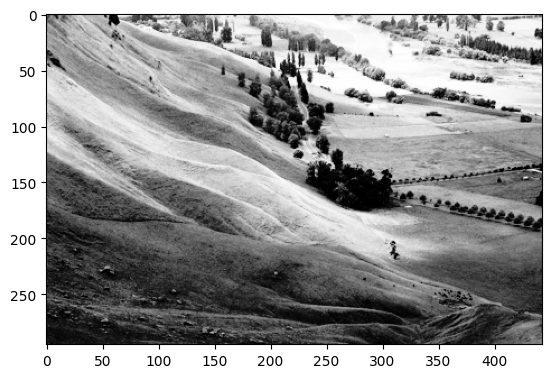

In [ ]:
equ=cumulative_histogram_equalization(image)
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
#cdf= Cumulative Distribution Function of an image
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(equ,cmap="gray", vmin=0, vmax=255)
plt.show()

##Observation et interpretation :

CHE utilise la distribution cumulative pour ajuster le contraste, ce qui tend à préserver la dynamique originale.

Les images après application de l'HE et du CHE  peuvent sembler très similaires visuellement. Dans un tel cas, la soustraction de la valeur minimale de distribution cumulative (CD min) en CHE n'a qu'un faible impact car elle est très proche de zéro, ne modifiant pas sensiblement l'histogramme de l'image. Par conséquent, l'effet visuel de l'HE et du CHE peut apparaître quasi identique.

#Adaptive Histogram Equalization (AHE)

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
from skimage.io import imsave, imread

<ipython-input-19-f8d53e636e7d>:9: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  img_local = rank.equalize(img, selem=kernel)


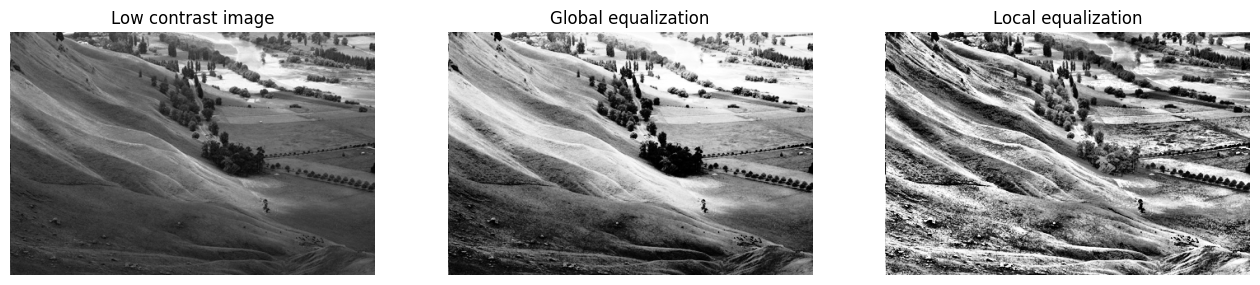

In [ ]:
# Original image
path = "/content/vallee.png"
img = img_as_ubyte(imread(path, as_gray=True))
# Global equalize
img_global = exposure.equalize_hist(img)
# Local Equalization, disk shape kernel
# Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, selem=kernel)
plt.rcParams['figure.figsize'] = [16, 16]
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)
ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()
ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()
ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()
plt.show()

##Observation et interpretation :

AHE ajuste le contraste localement, en traitant des sections de l'image indépendamment, ce qui peut révéler des détails cachés sans affecter globalement l'image.

**Égalisation globale** : L'image après une égalisation globale présente un contraste accru sur l'ensemble de l'image, mais peut introduire une perte de détails dans les extrêmes de luminosité.

**Égalisation locale** : L'approche d'égalisation locale, souvent réalisée par AHE, améliore le contraste de façon plus ciblée, mettant en évidence des détails dans les zones variées sans affecter de manière excessive l'ensemble de l'image. Cela permet d'obtenir une représentation plus fidèle des structures et textures d'origine.

#Contrastive Limited Adaptive Equalization - CLAHE

In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
path = "/content/vallee.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayimg)


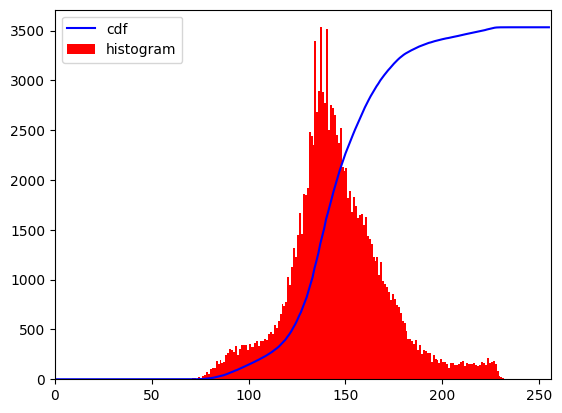

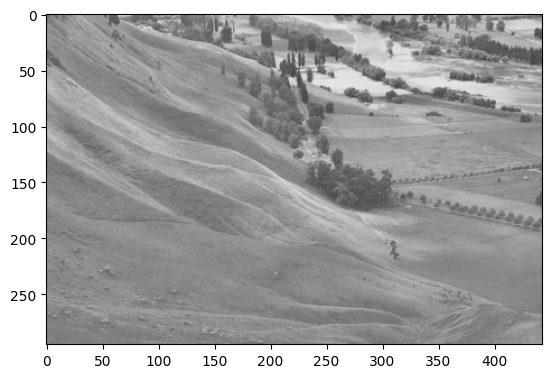

In [24]:
hist,bins = np.histogram(cl1.flatten(),256,[0,256])
cdf = hist.cumsum()
hist,bins = np.histogram(cl1.flatten(),256,[0,256])
cdf = hist.cumsum()
#cdf= Cumulative Distribution Function of an image
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(cl1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(cl1,cmap="gray", vmin=0, vmax=255)
plt.show()

##Observation et interpretation :


CLAHE applique AHE avec une limitation du contraste pour éviter la sur-amplification du bruit.


Histogramme CLAHE : L'histogramme montre une meilleure répartition des valeurs d'intensité avec moins de pics extrêmes, ce qui indique une amélioration du contraste sans amplification excessive.

Image CLAHE : L'image traitée avec CLAHE révèle un contraste renforcé et une meilleure distinction des détails, surtout dans les zones qui étaient auparavant soit trop sombres soit trop claires. Cela permet une visualisation plus détaillée de la texture du paysage.